In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
sns.set(color_codes=True)

## Simple Linear Regression

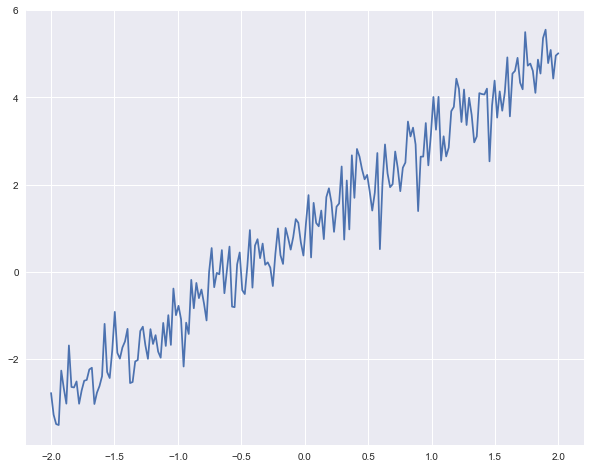

In [20]:
x = np.linspace(-2, 2, 200)
y = 2 * x + 0.5 * np.random.randn(200) + 1
plt.plot(x, y)

### Build Model

### Custom Class

In [47]:
class Linear(nn.Module):
    def __init__(self, input_size, out_size):
        super(Linear, self).__init__()
        self.linear = nn.Linear(input_size, out_size)
    def forward(self, x):
        net = self.linear(x)
        return net
model = Linear(1, 1)

In [48]:
model

Linear(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Sequential

In [ ]:
model = nn.Sequential(nn.Linear(1, 1))

In [49]:
mse = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=3e-2)  

### Train

In [52]:
for epoch in range(1000):
    optim.zero_grad()
    x_torch = Variable(torch.Tensor(x))
    x_torch = x_torch.view(200, 1)
    y_torch = Variable(torch.Tensor(y))
    y_torch = y_torch.view(200, 1)
    f_torch = model(x_torch)
    loss = mse(f_torch, y_torch)
    loss.backward()
    optim.step()
#     print (epoch, loss.data.numpy()[0])

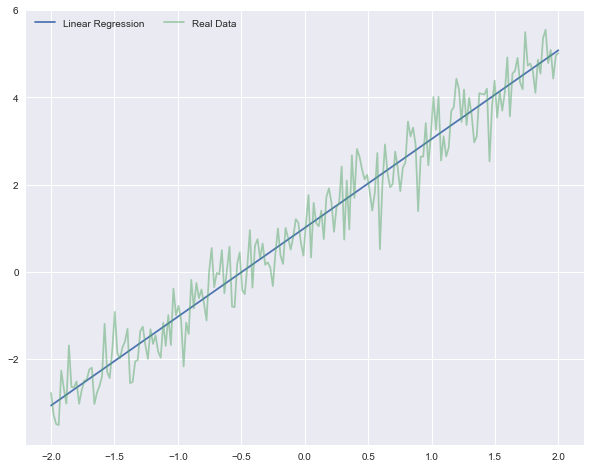

In [53]:
f = f_torch.data.numpy()
plt.plot(x, f, c='b', alpha=1, label="Linear Regression")
plt.plot(x, y, c='g', alpha=0.5, label='Real Data')
plt.legend(loc=0, ncol=5)

## Save and Load Model

In [54]:
# Save and load the entire model.  Need to install Pickle
# torch.save(model, 'model.pkl')
# model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(model.state_dict(), 'linear.pkl')
# model.load_state_dict(torch.load('params.pkl'))